In [1]:
import networkx as nx
import time

from amplpy import AMPL, add_to_path
add_to_path(r"/home/nitish/Nitish/ampl.linux-intel64")

In [3]:
ampl = AMPL()
ampl.reset()
ampl.read("fea_flow.mod")
# tree_ampl.read("spi_tree_lp.mod")
input_data_file = f"/home/nitish/minotaur/examples/water-network/Data/d1_Sample_input_cycle_twoloop.dat"
# input_data_file = f"/home/nitish/minotaur/examples/water-network/model/Fea_Flow/one_loop.dat"
ampl.read_data(input_data_file)
ampl.option["solver"] = "cplex"
ampl.solve()
ampl.eval("display q;")

Solution determined by presolve;
objective total_cost = 0.
q :=
1 2   311.109
2 3   102.777
2 4   180.554
3 5    75
4 5     0
4 6   147.221
6 7    55.555
7 5     0
;



In [4]:
q_value = ampl.getVariable("q").getValues().toDict()
for (i, j), value in q_value.items():
    print(value)

311.1087
102.777
180.554
75
0
147.221
55.555
0


In [25]:
def f(x):
    # return (0.001**1.852)*(10.68*1000/((130**1.852) *0.6096))*( (q_value[4,5]+x)*abs(q_value[4,5]+x)**0.852 + (q_value[2,4]+x)*abs(q_value[2,4]+x)**0.852 - (q_value[2,3]- x)*abs(q_value[2,3]-x)**0.852 - (q_value[3,5]-x)*abs(q_value[3,5]-x)**0.852)
	return (q_value[2,4]+x)*abs(q_value[2,4]+x)**0.852 + (q_value[4,6]+x)*abs(q_value[4,6]+x)**0.852 + (q_value[6,7]+x)*abs(q_value[6,7]+x)**0.852 + (q_value[7,5]+ x)*abs(q_value[7,5]+x)**0.852  - (q_value[3,5]-x)*abs(q_value[3,5]-x)**0.852 - (q_value[2,3]- x)*abs(q_value[2,3]-x)**0.852 
    

In [26]:
from scipy.optimize import bisect


In [27]:
bisect(f, -311,311)

-36.45134274224934

Approximate root (x where f(x) = 0): -36.45134274224934


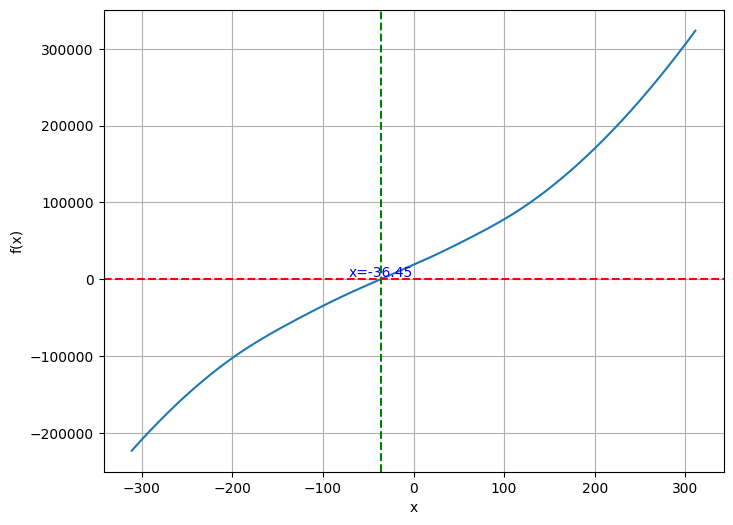

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect

# Define the function
def g(x):
    return x * np.abs(x) ** 0.852 + (x - 27.777) * np.abs(x - 27.777) ** 0.852 - (283.3313 - x) * np.abs(283.3313 - x) ** 0.852

# Use the bisection method to find the root (x where f(x) = 0)
root = bisect(f, -311, 311)

print("Approximate root (x where f(x) = 0):", root)

# Generate x values
x = np.linspace(-311.109, 311.109, 1000)

# Calculate corresponding y values
y = f(x)

# Plot the graph
plt.figure(figsize=(8, 6))
plt.plot(x, y)
# plt.axhline(0, color='red', linestyle='--', label='y=0')  # Add the horizontal line at y=0
plt.axvline(root, color='green', linestyle='--', label=f'x={root:.2f}')  # Vertical line at x=root

plt.xlabel('x')
plt.ylabel('f(x)')
# plt.title('Plot of g(x) = x * |x|^0.852 + (x - 27.777) * |x - 27.777|^0.852 - (283.3313 - x) * |283.3313 - x|^0.852')
plt.text(root, -1, f'x={root:.2f}', verticalalignment='bottom', horizontalalignment='center', color='blue', fontsize=10)

plt.grid(True)
plt.show()

In [24]:
print("q[2,3]=", q_value[2,3]-root)
print("q[3,5]=", q_value[3,5]-root)
print("q[4,5]=", q_value[4,5]+root)
print("q[2,4]=", q_value[2,4]+root)

q[2,3]= 122.51161278305968
q[3,5]= 94.73461278305967
q[4,5]= -19.734612783059678
q[2,4]= 160.81938721694033
